# Simulator vs. Quantum Machines


We can run the device indepdent tests on a real quantum machine and a simulator to compare the result. We have used
'ibmq_qasm_simulator' and 'ibmq_16_melbourne' to run these tests.

<img src="img/quantum_v_simulator.png" alt="Drawing" style="width: 800px;"/>

As expected, the quantum computer does not perform as well as the simulator. However, the classical bounds are still broken by the quantum computer. Note that the dimensionality bound is the same for quantum and classical.


## Test Setup

In [5]:
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, IBMQ
from qiskit.tools.monitor import *
from qiskit.providers.ibmq.managed import IBMQJobManager

provider = IBMQ.load_account()

import matplotlib.pyplot as plt
import numpy as np

import context
from device_independent_test.handshake import HandShake
from device_independent_test.quantum_communicator import LocalDispatcher

# number of shots used in testing
max_shots = 8192

# paramters used for testing
def get_params(shots):
     return {
        "dimensionality": {
            "tolerance": 0.3,
            "shots": shots
        },
        "entanglement": {
            "tolerance": 0.7,
            "shots": shots
        },
        "measurement_incompatibility": {
            "tolerance": 0.5,
            "shots": shots
        }
    }

ibmqfactory.load_account:WARNING:2020-07-01 06:47:28,849: Credentials are already in use. The existing account in the session will be replaced.


## Running on Simulator

Tests pass with tight tolerance.

In [6]:
dispatcher = LocalDispatcher([provider.get_backend('ibmq_qasm_simulator')])
handshake = HandShake(dispatcher)

handshake.test_all(get_params(max_shots))

Passed Dimensionality with value:  1.0
Passed Measurment Incompatibility with value:  6.8309326171875
Passed Entanglement with value:  2.818115234375


True

## Running on 'ibmq_16_melbourne'

Tests pass with wide tolerance.

In [7]:
dispatcher = LocalDispatcher([provider.get_backend('ibmq_16_melbourne')])
handshake = HandShake(dispatcher)
handshake.test_all(get_params(shots=max_shots))

Passed Dimensionality with value:  0.910552978515625
Passed Measurment Incompatibility with value:  6.551025390625
Passed Entanglement with value:  2.212646484375


True

## Generating Plots

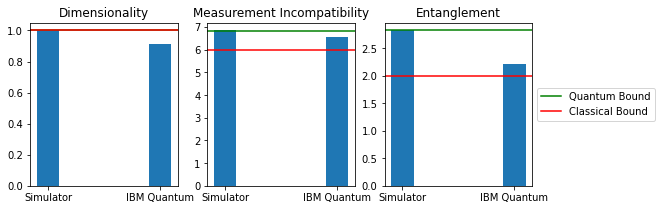

In [24]:
names = ["Simulator", "IBM Quantum"]
dimensionality = [1.0, 0.910552978515625]
measurement_incompatibility = [6.84375, 6.551025390625]
entanglement = [2.8232421875, 2.212646484375]
expected = {
    "dimensionality": 1.0,
    "measurement_incompatibility": 6.82842712475,
    "entanglement": 2.8284271247461903
}

classical = {
    "dimensionality": 1.0,
    "measurement_incompatibility": 6,
    "entanglement": 2
}

plt.figure(figsize=(9,3))

plt.subplot(131)
index = np.arange(2)
width = 0.2
plt.bar(index, dimensionality, align='center', width=width)
plt.axhline(expected["dimensionality"], color='green')
plt.axhline(classical["dimensionality"], color='red')
plt.xticks(index, names)
plt.title('Dimensionality')

plt.subplot(132)
plt.bar(index, measurement_incompatibility, align='center', width=width)
plt.axhline(expected["measurement_incompatibility"], color='green')
plt.axhline(classical["measurement_incompatibility"], color='red')

plt.xticks(index, names)
plt.title('Measurement Incompatibility')

plt.subplot(133)
plt.bar(index, entanglement, align='center', width=width)
qbound = plt.axhline(expected["entanglement"], color="green")
cbound = plt.axhline(classical["entanglement"], color="red")
plt.xticks(index, names)
plt.title('Entanglement')
plt.legend([qbound, cbound], ["Quantum Bound", "Classical Bound"], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

